<a href="https://colab.research.google.com/github/avaradharaju/aiml-projects/blob/master/Project1-MovieLensDataExploration/movie_lens_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MovieLens Data Exploration

## Objective

- Exploratory Data Analysis
- Visualization using Python
- Pandas – groupby, merging

## Standard Imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

## Define generic functions

In [ ]:
def add_stats(ax, text):
    ax.text(.55, .8, text, 
            multialignment='right', 
            transform=ax.transAxes, 
            bbox=dict(facecolor='white', alpha=0.6), 
            fontsize=14)
    return ax

In [ ]:
def histogram(ax, data, yaxis_label=None):
    xlabel = data.name
    ylabel = yaxis_label
    title = "Histogram: {}".format(data.name)
    text = '''\
        Mean: {0:.2f}
        StdEnv: {1:.2f}
        Skewness: {2:.2f}
        '''.format(data.mean(), data.std(), data.skew())
    ax.hist(data, bins='auto', color='blue', alpha=0.6, edgecolor = 'white')
    #ax = add_stats(ax, text)
    ax.set_xlabel('{}'.format(xlabel), fontsize=15, labelpad=14)
    ax.set_ylabel('{}'.format(ylabel), fontsize=15, labelpad=14)
    ax.set_title('{}'.format(title), fontsize=18)
    return ax

In [ ]:
def barplot(column, ax, yaxis_label=None, title=None, rotate=0, sort_xaxis=False):
    if sort_xaxis:
        value_count = column.value_counts().sort_index()
    else:
        value_count = column.value_counts()
    index = np.arange(len(value_count.index))
    x_label = column.name
    y_label = yaxis_label
    if title:
        title = 'Barplot: '+ title
    else:
        title = 'Barplot: '+ column.name
    ax.bar(index, value_count.values, color='blue', alpha=0.6, width=0.8)
    ax.set_xticks(index)
    ax.set_xticklabels(value_count.index, fontsize=14, rotation=rotate)
    ax.set_xlabel('{}'.format(x_label), fontsize=15)
    ax.set_ylabel('{}'.format(y_label), fontsize=15)
    ax.set_title('{}'.format(title), fontsize=18)
    return ax

In [ ]:
def diff(list1, list2): 
    return (list(set(list1) - set(list2)))

## Load the datasets

In [ ]:
ratings_url = 'https://raw.githubusercontent.com/avaradharaju/aiml-projects/master/Project1-MovieLensDataExploration/ml-100k/u.data'
movies_url = 'https://raw.githubusercontent.com/avaradharaju/aiml-projects/master/Project1-MovieLensDataExploration/ml-100k/u.item'
user_url = 'https://raw.githubusercontent.com/avaradharaju/aiml-projects/master/Project1-MovieLensDataExploration/ml-100k/u.user'

In [ ]:
ratings = pd.read_csv(ratings_url, header=None, sep='\t', encoding='latin-1', names=["user_id", "movie_id", "rating", "timestamp"])
movies = pd.read_csv(movies_url, header=None, sep='|', encoding='latin-1', names=["movie_id","title","release_date","video_release_date","imdb_url","unknown","action","adventure","animation","children","comedy","crime","documentary","drama","fantasy","film-noir","horror","musical","mystery","romance","sci-fi","thriller","war","western"])
user = pd.read_csv(user_url, header=None, sep='|', encoding='latin-1', names=["user_id", "age", "gender","occupation","zip_code"])

### Display dataset information

#### ratings dataset

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
movie_id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
ratings.shape

(100000, 4)

In [ ]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [ ]:
ratings.isnull().values.any()

False

- There are no missing values in the "ratings" dataset

#### movies dataset

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
unknown               1682 non-null int64
action                1682 non-null int64
adventure             1682 non-null int64
animation             1682 non-null int64
children              1682 non-null int64
comedy                1682 non-null int64
crime                 1682 non-null int64
documentary           1682 non-null int64
drama                 1682 non-null int64
fantasy               1682 non-null int64
film-noir             1682 non-null int64
horror                1682 non-null int64
musical               1682 non-null int64
mystery               1682 non-null int64
romance               1682 non-null int64
sci-fi                1682 non-null int64
thriller 

In [ ]:
movies.shape

(1682, 24)

In [ ]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,1682.0,841.500000,485.695893,1.0,421.25,841.5,1261.75,1682.0
video_release_date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unknown,1682.0,0.001189,0.034473,0.0,0.00,0.0,0.00,1.0
action,1682.0,0.149227,0.356418,0.0,0.00,0.0,0.00,1.0
adventure,1682.0,0.080262,0.271779,0.0,0.00,0.0,0.00,1.0
animation,1682.0,0.024970,0.156081,0.0,0.00,0.0,0.00,1.0
children,1682.0,0.072533,0.259445,0.0,0.00,0.0,0.00,1.0
comedy,1682.0,0.300238,0.458498,0.0,0.00,0.0,1.00,1.0
crime,1682.0,0.064804,0.246253,0.0,0.00,0.0,0.00,1.0
documentary,1682.0,0.029727,0.169882,0.0,0.00,0.0,0.00,1.0


- video_release_date seems to be null for all the rows

In [ ]:
movies.isnull().values.any()

True

In [ ]:
movies.isnull().sum()

movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
action                   0
adventure                0
animation                0
children                 0
comedy                   0
crime                    0
documentary              0
drama                    0
fantasy                  0
film-noir                0
horror                   0
musical                  0
mystery                  0
romance                  0
sci-fi                   0
thriller                 0
war                      0
western                  0
dtype: int64

- There seems to be nulls in the movies dataset
    - "video_release_date" columns seems to be missing all values
    - "release_date" seems to be missing one value
    - "imdb_url" seems to be missing three values
- "video_release_date" may have been replaced with "release_date" column. So we can drop that column safely

In [ ]:
# Remove the "video_release_date"
movies = movies.drop(['video_release_date'], axis=1)

In [ ]:
# Display rows that have missing values
movies[movies.isnull().any(axis=1)]

,movie_id,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
266,267,unknown,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1357,1358,The Deadly Cure (1996),16-Sep-1996,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1358,1359,Boys in Venice (1996),24-Sep-1996,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


- From the above data, we can see that the row with movie id 267 must be an invalid record. This record can be safely removed

In [ ]:
movies = movies.drop([266])

In [ ]:
# Display rows that have missing values
movies[movies.isnull().any(axis=1)]

,movie_id,title,release_date,imdb_url,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
1357,1358,The Deadly Cure (1996),16-Sep-1996,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1358,1359,Boys in Venice (1996),24-Sep-1996,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### user dataset

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [ ]:
user.shape

(943, 5)

In [ ]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [ ]:
user.isnull().values.any()

False

- There are no missing values in the user dataset

## Find the number of movie per genre

In [ ]:
list_genre = diff(movies.columns.tolist(), ['movie_id','title', 'release_date', 'imdb_url'])
list_genre.sort()
movies[list_genre].sum()

action         251
adventure      135
animation       42
children       122
comedy         505
crime          109
documentary     50
drama          725
fantasy         22
film-noir       24
horror          92
musical         56
mystery         61
romance        247
sci-fi         101
thriller       251
unknown          1
war             71
western         27
dtype: int64

## Find the movies that have more than one genre

In [ ]:
movies_item = movies[['movie_id', 'title']]

In [ ]:
list_movie_genres = diff(movies.columns.tolist(), ['movie_id', 'release_date', 'imdb_url'])

In [ ]:
movies_item['genre_count'] = movies[list_movie_genres].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
movies_item[movies_item['genre_count']>1].shape[0]

849

## Drop the movie where the genre is unknown

In [ ]:
movies = movies[movies['unknown'] != 1]

## Univariate Plots

### Rating

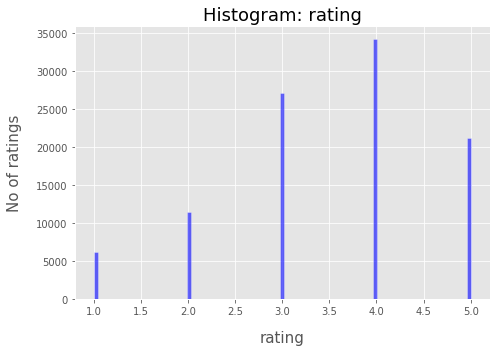

In [ ]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
histogram(ax, ratings['rating'], yaxis_label='No of ratings')
plt.tight_layout()
plt.show()

### Age

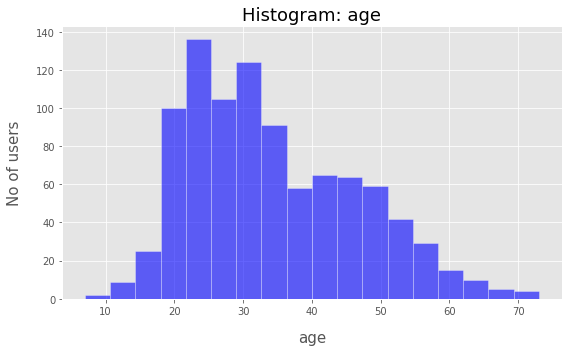

In [ ]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
histogram(ax, user['age'], yaxis_label='No of users')
plt.tight_layout()
plt.show()

### Release date

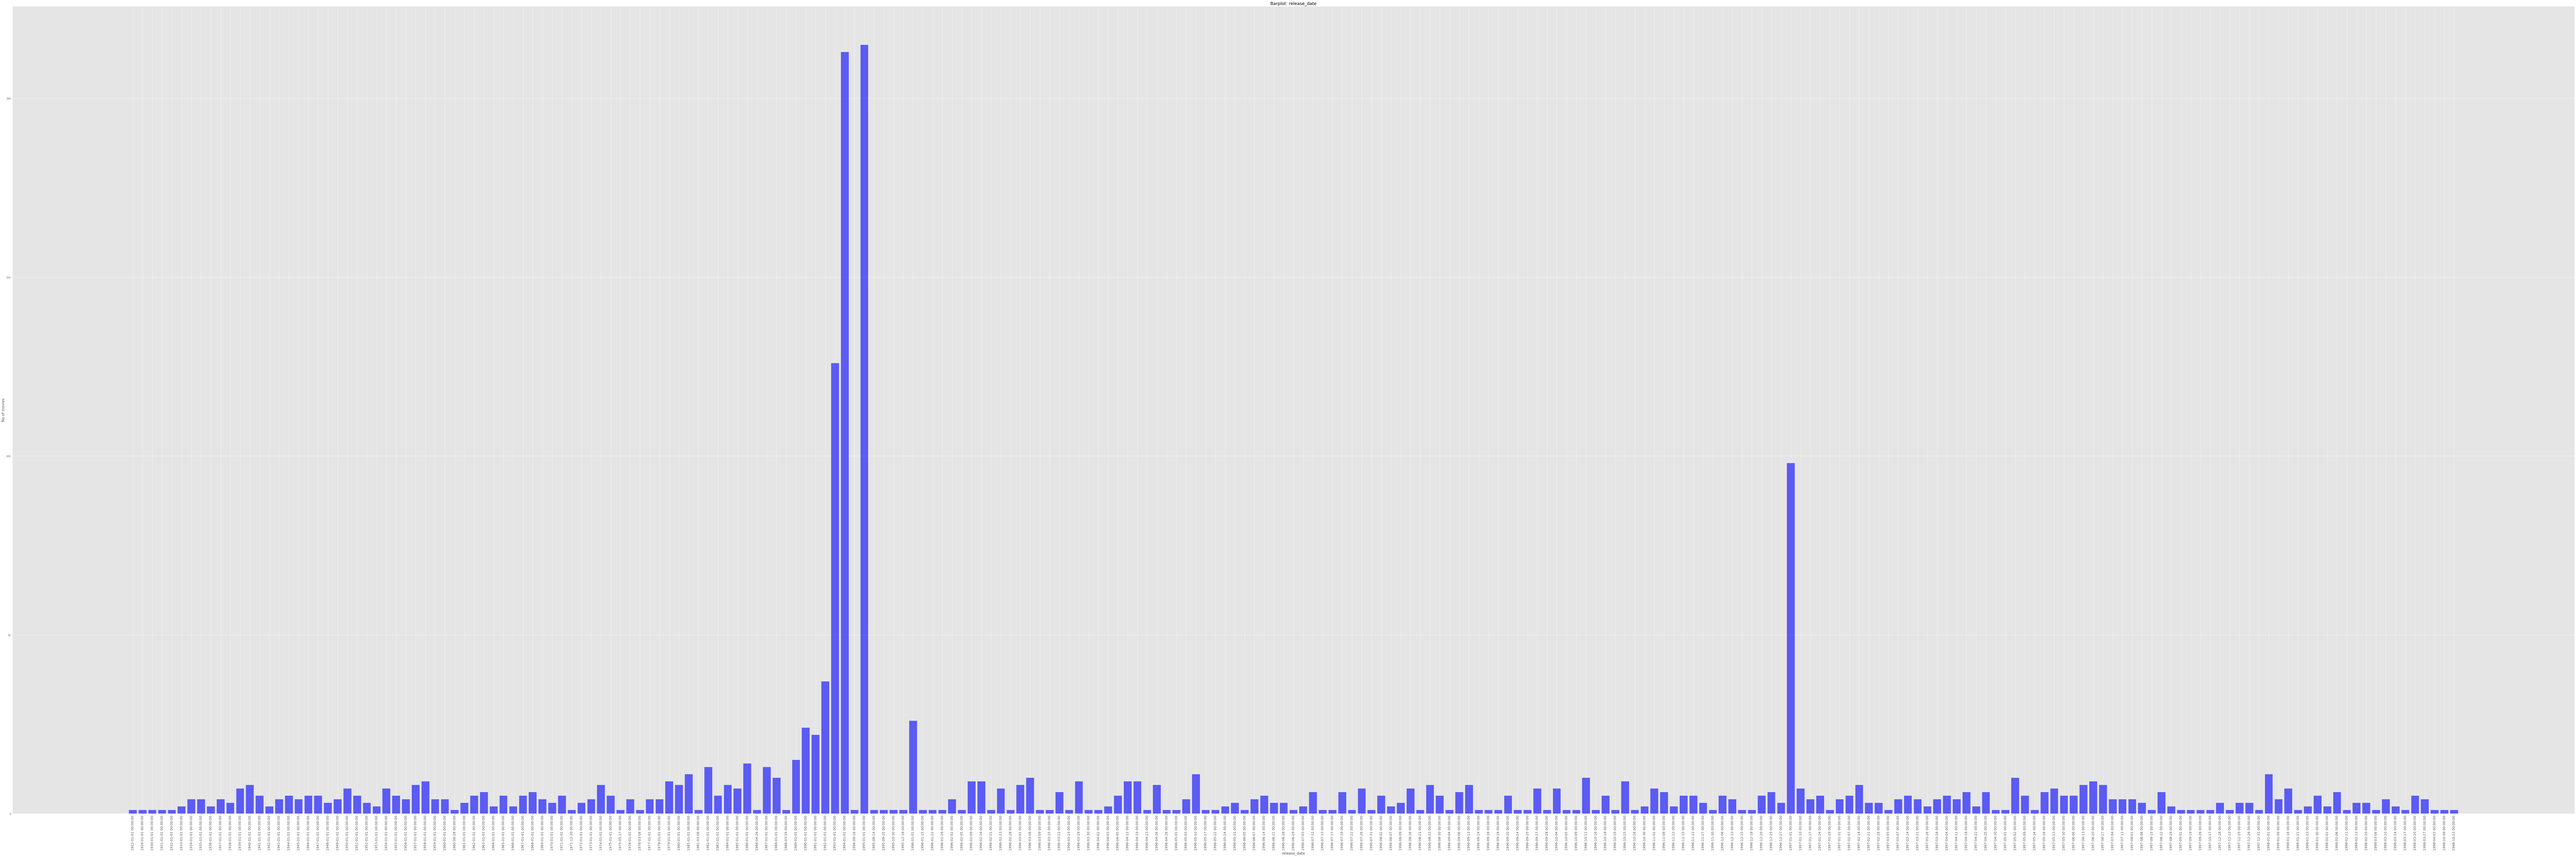

In [ ]:
#fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
#release_date=pd.to_datetime(item['release date'])
#print(type(release_date))
#histogram(ax, release_date, yaxis_label='No of movies')
#plt.tight_layout()
#plt.show()

movies['release_date'] = pd.to_datetime(movies['release_date'])
movies = movies.sort_values(['release_date'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(150, 50))
releasedate=movies['release_date']
barplot(releasedate, ax, yaxis_label='No of movies', rotate=90, sort_xaxis=True)
plt.tight_layout()
plt.show()

### Release Year

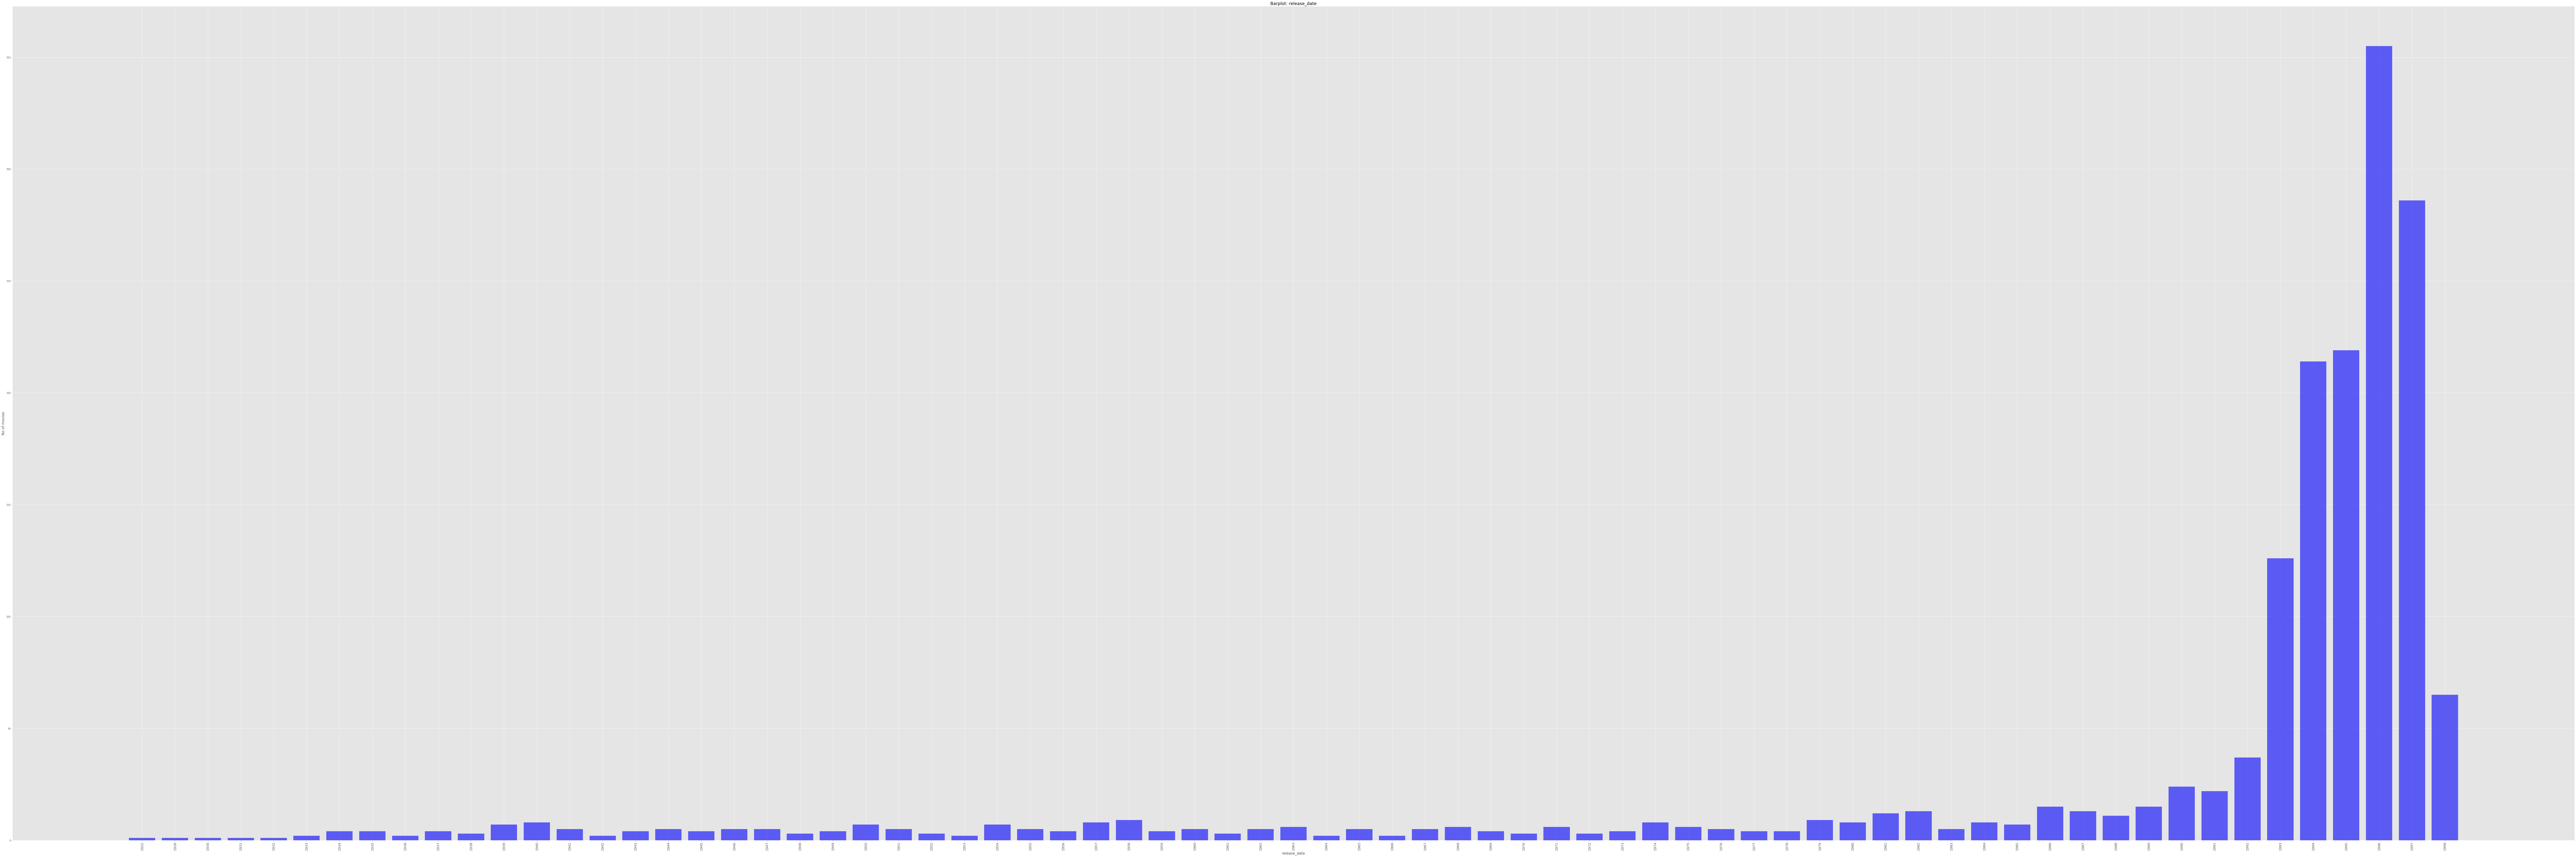

In [ ]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies = movies.sort_values(['release_date'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(150, 50))
releasedate=movies['release_date'].dt.year
barplot(releasedate, ax, yaxis_label='No of movies', rotate=90, sort_xaxis=True)
plt.tight_layout()
plt.show()

### Gender

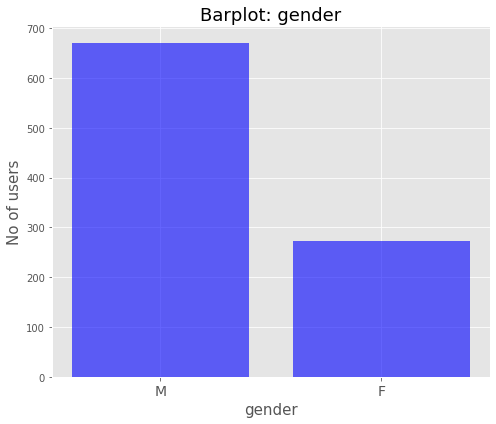

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
barplot(user['gender'], ax, yaxis_label='No of users', rotate=0)
plt.tight_layout()
plt.show()

### Occupation

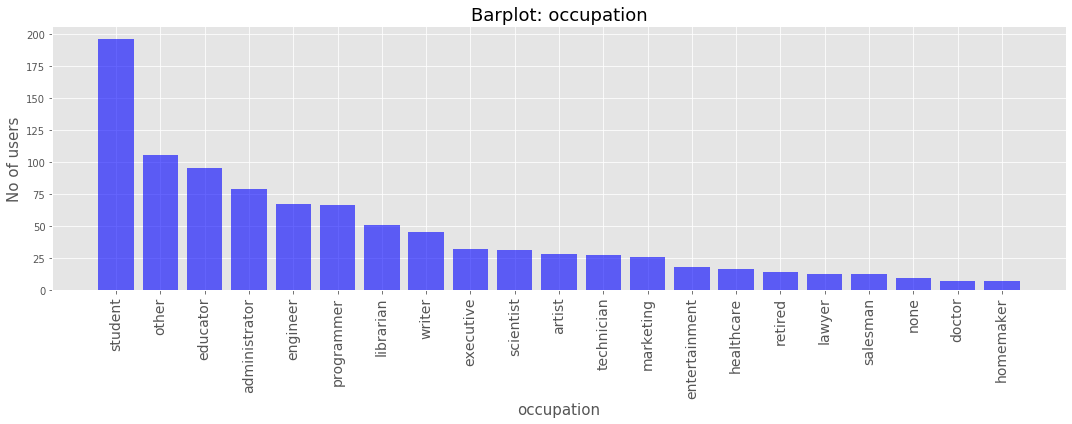

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
barplot(user['occupation'], ax, yaxis_label='No of users', rotate=90)
plt.tight_layout()
plt.show()

In [ ]:
user_ratings_df = user.merge(ratings, on='user_id', how='inner')
movie_lens_df = movies.merge(user_ratings_df, on='movie_id', how='inner' )

## Visualize how popularity of Genres has changed over the years. 
- From the graph one should be able to see for any given year, movies of which genre got released the most.

Text(0, 0.5, 'Number of movies per Genre')

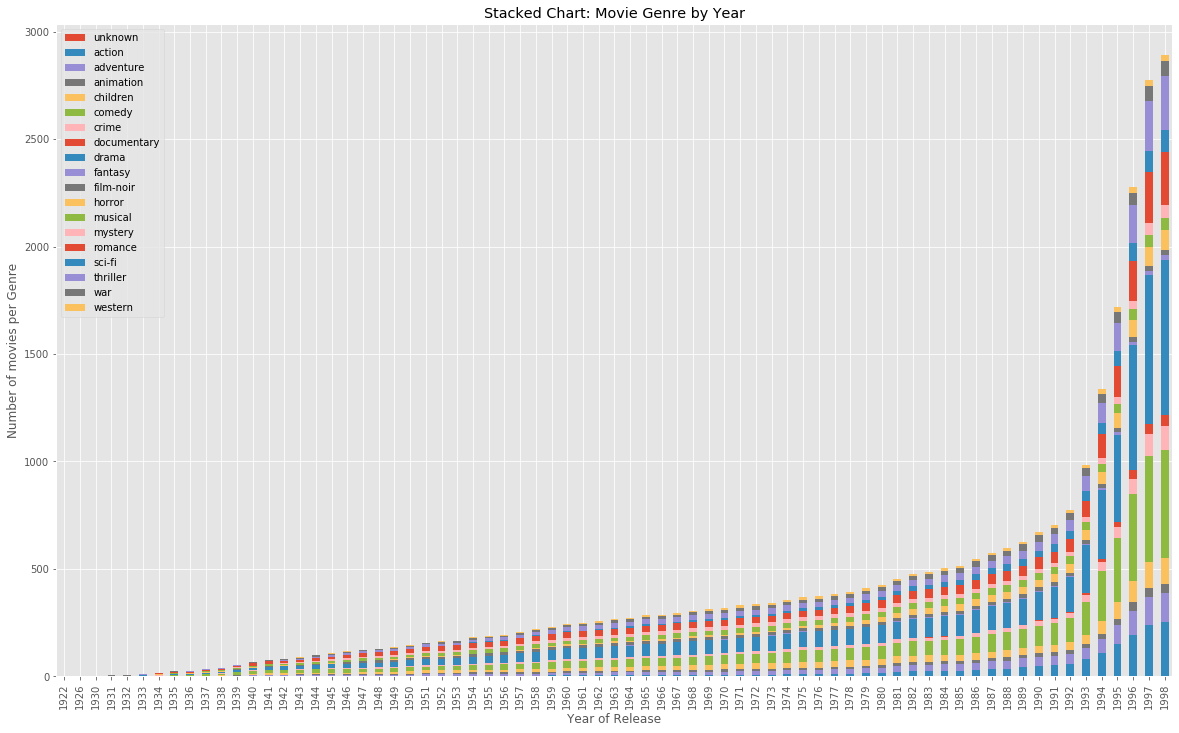

In [ ]:
viridis = cm.get_cmap('viridis', 19)
movie_lens_df['year'] = movie_lens_df['release_date'].dt.year
genres = ["unknown","action","adventure","animation","children","comedy","crime","documentary","drama","fantasy","film-noir","horror","musical","mystery","romance","sci-fi","thriller","war","western"]
tmp = movie_lens_df.groupby(['year'])
genre_df = pd.DataFrame({'All_movies' : tmp.year.nunique().cumsum()})
for genre in genres:
    tmp = movie_lens_df[movie_lens_df[genre] == 1][['movie_id', 'year']].groupby('year')
    genre_df[genre] = tmp.movie_id.nunique().cumsum()
genre_df.fillna(method='ffill', inplace=True)
ax = genre_df.loc[:,genre_df.columns!='All_movies'].plot.bar(stacked=True, figsize=(20,12), title='Stacked Chart: Movie Genre by Year')#, color=viridis.colors)
# ax = genre_df.loc[:,genre_df.columns!='All_movies'].plot.bar(stacked=True, figsize=(20,12), title='Stacked Chart: Movie Genre by Year', color=viridis.colors)

# Set the x-axis label
ax.set_xlabel("Year of Release")

# Set the y-axis label
ax.set_ylabel("Number of movies per Genre")

## Display the top 25 movies by average rating, as a list/series/dataframe. 
 - Note:- Consider only the movies which received atleast a 100 ratings

In [ ]:
movie_100_ratings = movie_lens_df.groupby('title')['rating'].count()
list_movie_100_ratings = list(movie_100_ratings[movie_100_ratings.values>100].index)

In [ ]:
avg_rating = movie_lens_df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating[avg_rating['title'].isin(list_movie_100_ratings)].head(25)

,title,rating
15,"Close Shave, A (1995)",4.491071
16,Schindler's List (1993),4.466443
17,"Wrong Trousers, The (1993)",4.466102
18,Casablanca (1942),4.456790
20,"Shawshank Redemption, The (1994)",4.445230
21,Rear Window (1954),4.387560
22,"Usual Suspects, The (1995)",4.385768
23,Star Wars (1977),4.358491
24,12 Angry Men (1957),4.344000
28,Citizen Kane (1941),4.292929


## Verify the following statements 
- (No need of doing a statistical test. Compare absolute numbers):
* Men watch more drama than women
* Men watch more Romance than women
* Women watch more Sci-Fi than men

In [ ]:
genre_by_gender = movie_lens_df.groupby('gender').sum().loc[:,'action':'western'] 

In [ ]:
genre_by_gender['total'] = genre_by_gender.sum(axis = 1)

In [ ]:
gender_wise_df = genre_by_gender.div(genre_by_gender.total, axis= 0) * 100

In [ ]:
gender_wise_df

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


In [ ]:
genre = ['drama', 'romance', 'sci-fi']
genre_percent_data = []
for item in genre:
    for sex in ['M', 'F']:
        genre_percent_data.append([item, sex, gender_wise_df[item][sex]])

In [ ]:
genre_df = df = pd.DataFrame(genre_percent_data, columns = ['genre', 'sex', 'percentage']) 

In [ ]:
import plotly.express as px
fig = px.bar(genre_df, x="sex", y="percentage", color='sex', facet_col="genre")
fig.update_xaxes(matches=None)
fig.show()

### Conclusion

- From the above plot, we can conclude the following:
    - For Genre Drama, the percentage of Female viewers are more. So the statement "Men watch more drama than women" is False
    - For Genre Romance, the percentage of Female viewers are more. So the statemet "Men watch more Romance than women" is False
    - For Genre Sci-Fi, the percentage of Male viewers are more. So the statement "Women watch more Sci-Fi than men" is False